In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat', 
    'Sandal', 
    'Skirt', 
    'Sneacker', 
    'Bag', 
    'Ankle boot'
]

In [4]:
train_images.shape

(60000, 28, 28)

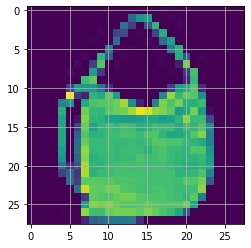

In [8]:
plt.figure()
plt.imshow(train_images[5900])
plt.grid(True)

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

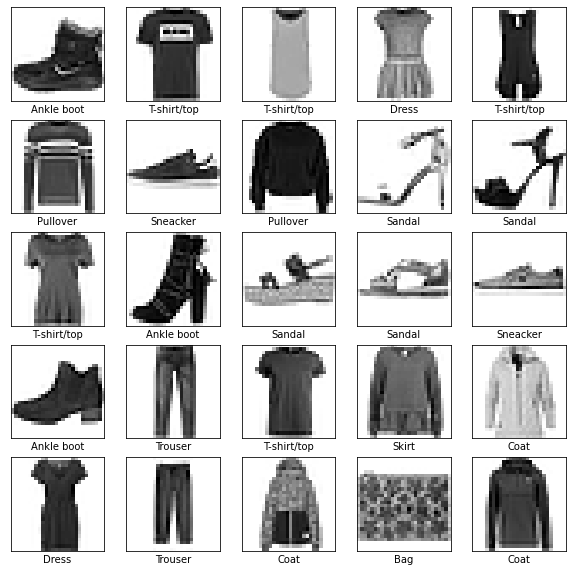

In [11]:
%matplotlib inline 
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Creation of the Convolutional NN

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), 
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer=keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2304 - accuracy: 0.9130
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2259 - accuracy: 0.9160
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2189 - accuracy: 0.9179
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2112 - accuracy: 0.9205
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2058 - accuracy: 0.9225
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2014 - accuracy: 0.9242
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1953 - accuracy: 0.9270
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1907 - accuracy: 0.9278
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1853 - accuracy: 0.9303
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.180

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8716
Accuracy: 0.8715999722480774


In [20]:
predictions = model.predict(test_images)

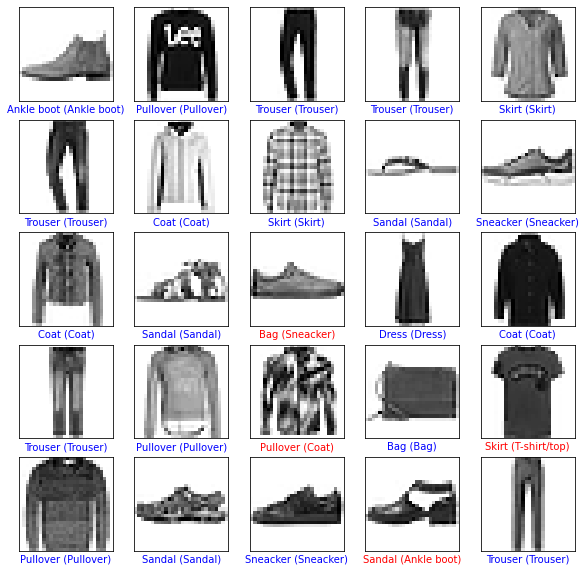

In [21]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f'{class_names[predicted_label]} ({class_names[true_label]})', color=color)